Tugas Akhir
Mata Kuliah : Data Science
Kelompok 2
Nama Anggota :  1. Ersi Aditya Al'Amin
                2.
                3.
                4.
                5.
                6.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [2]:
data = pd.read_csv('weather.csv')

In [20]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  int32  
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  int32  
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  int32  
 10  Weather Type          13200 non-null  int32  
dtypes: float64(5), int32(4), int64(2)
memory usage: 928.2 KB


In [22]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1.990227,1005.827896,4.005758,1.849394,5.462917,1.094091,1.500000
std,17.386327,20.194248,6.908704,31.946541,1.012302,37.199589,3.856600,1.164824,3.371499,0.791420,1.118076
min,-25.000000,20.000000,0.000000,0.000000,0.000000,800.120000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,2.000000,994.800000,1.000000,1.000000,3.000000,0.000000,0.750000
50%,21.000000,70.000000,9.000000,58.000000,2.000000,1007.650000,3.000000,2.000000,5.000000,1.000000,1.500000
75%,31.000000,84.000000,13.500000,82.000000,3.000000,1016.772500,7.000000,3.000000,7.500000,2.000000,2.250000
max,109.000000,109.000000,48.500000,109.000000,3.000000,1199.210000,14.000000,3.000000,20.000000,2.000000,3.000000


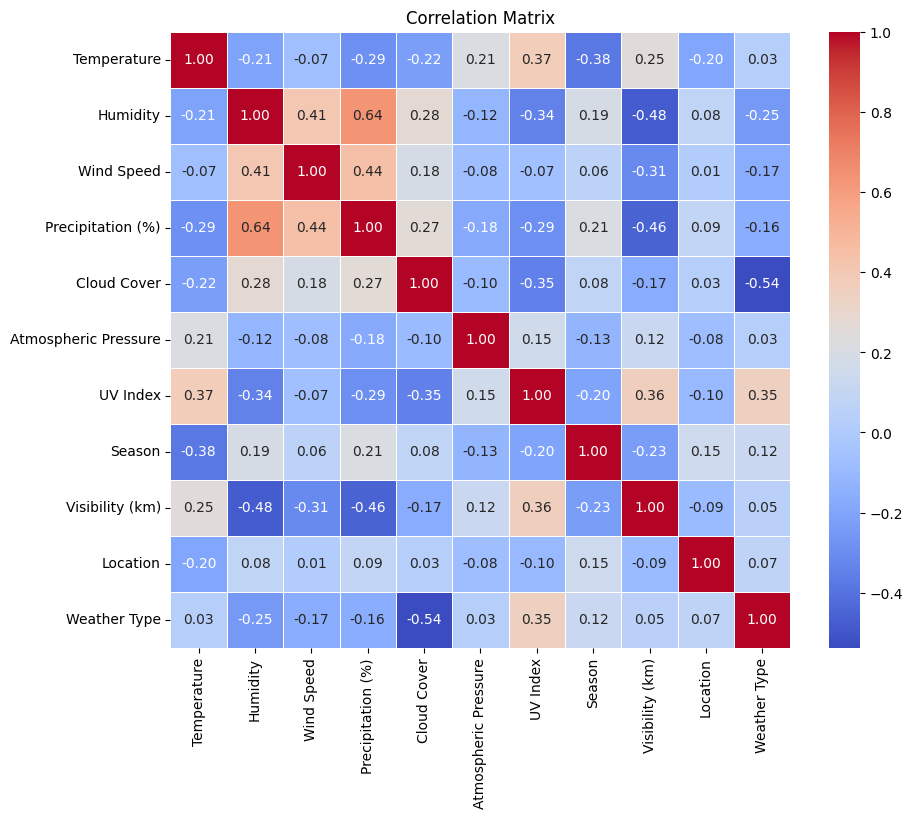

In [19]:
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [23]:
corr_weather = corr_matrix['Weather Type'].sort_values(ascending=False)
print("Korelasi antara fitur dengan Weather Type:")
print(corr_weather)

Korelasi antara fitur dengan Weather Type:
Weather Type            1.000000
UV Index                0.345804
Season                  0.118791
Location                0.071665
Visibility (km)         0.047448
Atmospheric Pressure    0.030679
Temperature             0.028923
Precipitation (%)      -0.161578
Wind Speed             -0.166485
Humidity               -0.250558
Cloud Cover            -0.536681
Name: Weather Type, dtype: float64


In [3]:
label_encoders = {}
for col in ['Cloud Cover', 'Season', 'Location', 'Weather Type']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [4]:
# Identifikasi fitur dengan korelasi > 0.5
correlation_matrix = data.corr()
selected_features = correlation_matrix['Weather Type'][correlation_matrix['Weather Type'] > 0.5].index.tolist()

# Jika tidak ada fitur dengan korelasi > 0.5, gunakan semua fitur kecuali target
if len(selected_features) <= 1:
    selected_features = [col for col in data.columns if col != 'Weather Type']


In [5]:
X = data[selected_features]
y = data['Weather Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:

y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[582  34  14  21]
 [ 38 586  10  13]
 [ 20  11 660  10]
 [ 31  11  23 576]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       651
           1       0.91      0.91      0.91       647
           2       0.93      0.94      0.94       701
           3       0.93      0.90      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



In [8]:

model_filename = 'weather_prediction_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

In [11]:

training_features = list(X.columns)  
with open('training_features.pkl', 'wb') as file:
    pickle.dump(training_features, file)


In [15]:

weather_type_encoder = label_encoders['Weather Type']
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(weather_type_encoder, file)

In [9]:

def user_prediction(input_data):
    input_df = pd.DataFrame([input_data], columns=selected_features)
    prediction = model.predict(input_df)[0]
    predicted_label = label_encoders['Weather Type'].inverse_transform([prediction])[0]
    return predicted_label

In [10]:

contoh_input = {col: data[col].mean() for col in selected_features}  # Menggunakan nilai rata-rata sebagai contoh
hasil_prediksi = user_prediction(contoh_input)
print("\nHasil prediksi cuaca:", hasil_prediksi)


Hasil prediksi cuaca: Cloudy
